### **Init**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Reshape, UpSampling2D, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Conv2DTranspose, GlobalMaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
IMG_SIZE = (224, 224)
num_classes = 10
BATCH_SIZE = 64
EPOCH = 10
lr=1e-3

### **Data**

In [ ]:
data_dir = '/Research/Dataset/Bangla VFR Dataset 400x400 v1.0'

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=42,
    color_mode='grayscale',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=42,
    color_mode='grayscale',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

Found 60000 files belonging to 10 classes.
Using 48000 files for training.
Found 60000 files belonging to 10 classes.
Using 12000 files for validation.


In [ ]:
test_dir = '/Research/Dataset/Bangla VFR Test Dataset 400x400 v1.0'
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    color_mode='grayscale',
    label_mode='categorical',
    seed=42,
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 2000 files belonging to 10 classes.


### **Model**

In [ ]:
def autoencoder_architecture():
    inputs = Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 1))
    x = Conv2D(16, 3, strides=2, activation="relu")(inputs)
    x = Conv2D(32, 3, activation="relu")(x)
    x = MaxPooling2D(3)(x)
    x = Conv2D(32, 3, activation="relu")(x)
    x = Conv2D(16, 3, activation="relu")(x)

    x = GlobalMaxPooling2D()(x)

    x = Reshape((4, 4, 1))(x)
    x = Conv2DTranspose(16, 3, activation="relu")(x)
    x = Conv2DTranspose(32, 3, activation="relu")(x)
    x = UpSampling2D(3)(x)
    x = Conv2DTranspose(16, 3, activation="relu")(x)
    x = Conv2DTranspose(1, 3, activation="relu")(x)
    x = Flatten()(x)

    output = Dense(num_classes, activation='softmax')(x)
    autoencoder = Model(inputs, output, name="autoencoder")
    return autoencoder

In [ ]:
model = autoencoder_architecture()
model.compile(optimizer=Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 111, 111, 16)      160       
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 36, 36, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 16)        4624      
                                                       

In [ ]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=EPOCH
)

Epoch 1/10
750/750 [==============================] - 430s 572ms/step - loss: 0.4031 - accuracy: 0.8403 - val_loss: 0.0949 - val_accuracy: 0.9651
Epoch 2/10
750/750 [==============================] - 451s 601ms/step - loss: 0.0537 - accuracy: 0.9815 - val_loss: 0.0234 - val_accuracy: 0.9929
Epoch 3/10
750/750 [==============================] - 438s 583ms/step - loss: 0.0265 - accuracy: 0.9912 - val_loss: 0.0105 - val_accuracy: 0.9964
Epoch 4/10
750/750 [==============================] - 440s 587ms/step - loss: 0.0166 - accuracy: 0.9943 - val_loss: 0.0212 - val_accuracy: 0.9924
Epoch 5/10
750/750 [==============================] - 447s 596ms/step - loss: 0.0150 - accuracy: 0.9952 - val_loss: 0.0160 - val_accuracy: 0.9944
Epoch 6/10
750/750 [==============================] - 435s 579ms/step - loss: 0.0148 - accuracy: 0.9948 - val_loss: 0.0174 - val_accuracy: 0.9948
Epoch 7/10
750/750 [==============================] - 412s 549ms/step - loss: 0.0091 - accuracy: 0.9973 - val_loss: 0.0070 -

### **Evaluation**

In [ ]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
# print("Training Loss:\n", training_loss)
# print("Validation Loss:\n", validation_loss)
# print("Training Accuracy:\n", training_accuracy)
# print("Validation Accuracy:\n", validation_accuracy)

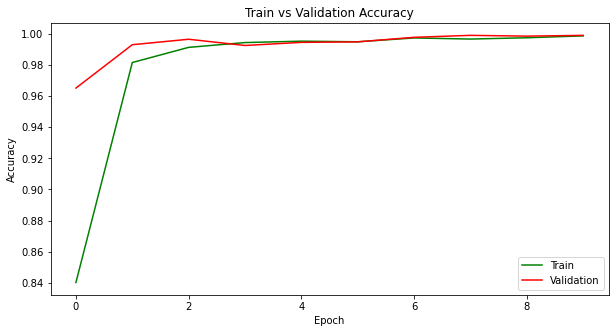

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(training_accuracy,'g', label='Train')
plt.plot(validation_accuracy,'r', label='Validation')
plt.title('Train vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('train-val_acc_plot.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

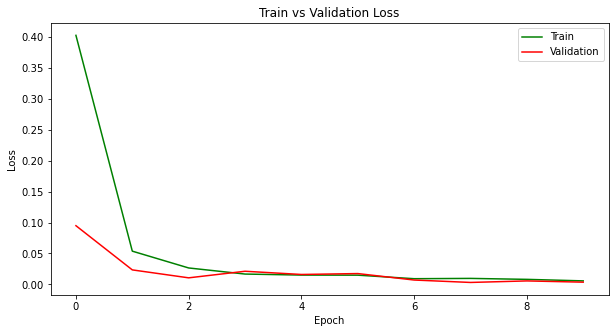

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(training_loss,'g', label='Train')
plt.plot(validation_loss,'r', label='Validation')
plt.title('Train vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('train-val_loss_plot.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
loss, acc = model.evaluate(test_dataset)
print(f"Test Accuracy : {acc}")
print(f"Test Loss : {loss}")

32/32 [==============================] - 4s 136ms/step - loss: 0.0030 - accuracy: 0.9995
Test Accuracy : 0.9994999766349792
Test Loss : 0.0030255296733230352


In [ ]:
predictions = model.predict(test_dataset)
predicted_labels = tf.argmax(predictions, axis=1)

true_labels = tf.concat([label for _, label in test_dataset], axis=0)
true_labels = tf.argmax(true_labels, axis=1)

class_report = classification_report(true_labels, predicted_labels, digits=6, zero_division=0)
print(class_report)

32/32 [==============================] - 5s 137ms/step
              precision    recall  f1-score   support

           0   0.995025  1.000000  0.997506       200
           1   1.000000  0.995000  0.997494       200
           2   1.000000  1.000000  1.000000       200
           3   1.000000  1.000000  1.000000       200
           4   1.000000  1.000000  1.000000       200
           5   1.000000  1.000000  1.000000       200
           6   1.000000  1.000000  1.000000       200
           7   1.000000  1.000000  1.000000       200
           8   1.000000  1.000000  1.000000       200
           9   1.000000  1.000000  1.000000       200

    accuracy                       0.999500      2000
   macro avg   0.999502  0.999500  0.999500      2000
weighted avg   0.999502  0.999500  0.999500      2000



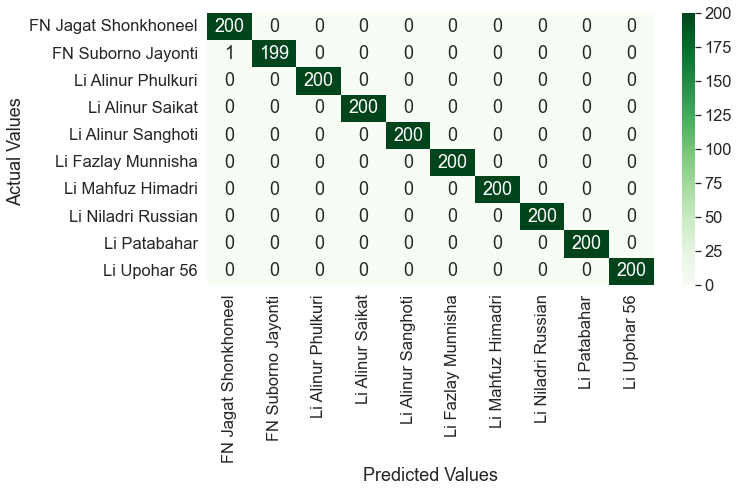

In [ ]:
cm = confusion_matrix(true_labels, predicted_labels)
class_names = test_dataset.class_names

plt.figure(figsize=(10, 5))
sns.set(font_scale=1.5)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=True, xticklabels=class_names, yticklabels=class_names)
ax.set_xticklabels(class_names, rotation=90)
ax.set_yticklabels(class_names, rotation=0)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')

plt.savefig('confusion_matrix_test.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
model.save("Bangla_Visual_Font_Recognizer.h5")
tf.keras.utils.plot_model(model,'Bangla_Visual_Font_Recognizer.pdf', show_shapes=True)

In [ ]:
model.save('./saved_model')

###**Quantization-Aware Training**

In [ ]:
!git clone https://github.com/google/qkeras.git
import sys
sys.path.append('qkeras')
!pip install git+https://github.com/keras-team/keras-tuner.git
!pip install tensorflow_model_optimization

In [ ]:
import tensorflow_model_optimization as tfmot

quantize_model = tfmot.quantization.keras.quantize_model
q_aware_model = quantize_model(model)

q_aware_model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=lr),
              metrics=['accuracy'])


q_aware_model.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 quantize_layer (QuantizeLay  (None, 224, 224, 1)      3         
 er)                                                             
                                                                 
 quant_conv2d (QuantizeWrapp  (None, 111, 111, 16)     195       
 erV2)                                                           
                                                                 
 quant_conv2d_1 (QuantizeWra  (None, 109, 109, 32)     4707      
 pperV2)                                                         
                                                                 
 quant_max_pooling2d (Quanti  (None, 36, 36, 32)       1         
 zeWrapperV2)                                          

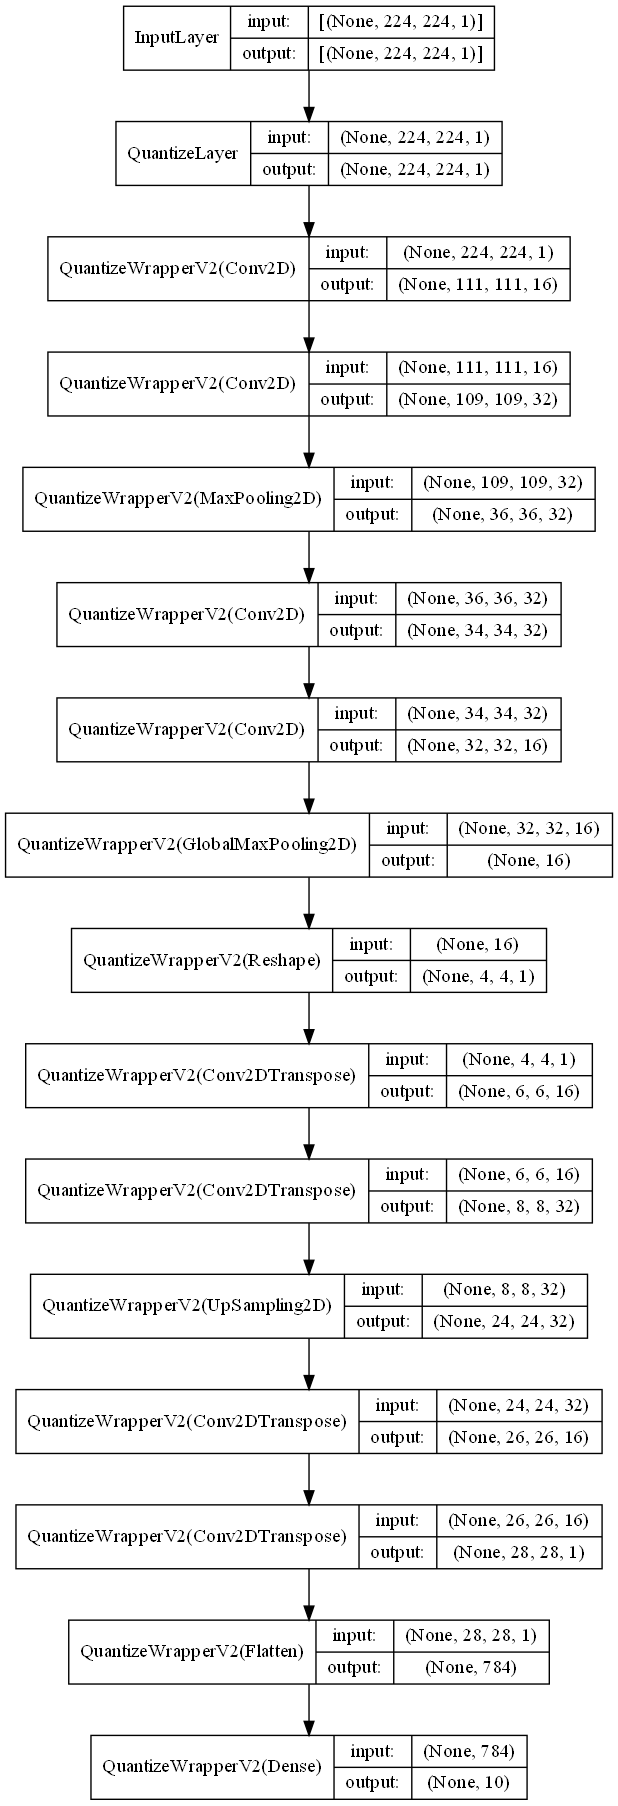

In [ ]:
tf.keras.utils.plot_model(
    q_aware_model, to_file='model.png', show_shapes=True, show_dtype=False,
    show_layer_names=False, rankdir='TB', expand_nested=False, dpi=100,
    layer_range=None, show_layer_activations=True
)

In [ ]:
hist = q_aware_model.fit(
    train_dataset,
    epochs=EPOCH,
    validation_data=val_dataset
)

Epoch 1/10
750/750 [==============================] - 523s 696ms/step - loss: 0.0683 - accuracy: 0.9814 - val_loss: 0.0107 - val_accuracy: 0.9974
Epoch 2/10
750/750 [==============================] - 522s 696ms/step - loss: 0.0136 - accuracy: 0.9960 - val_loss: 0.0061 - val_accuracy: 0.9977
Epoch 3/10
750/750 [==============================] - 522s 695ms/step - loss: 0.0041 - accuracy: 0.9987 - val_loss: 0.0061 - val_accuracy: 0.9983
Epoch 4/10
750/750 [==============================] - 523s 697ms/step - loss: 0.0029 - accuracy: 0.9993 - val_loss: 0.0076 - val_accuracy: 0.9983
Epoch 5/10
750/750 [==============================] - 524s 699ms/step - loss: 0.0099 - accuracy: 0.9973 - val_loss: 0.0108 - val_accuracy: 0.9974
Epoch 6/10
750/750 [==============================] - 573s 764ms/step - loss: 0.0061 - accuracy: 0.9980 - val_loss: 0.0105 - val_accuracy: 0.9977
Epoch 7/10
750/750 [==============================] - 644s 859ms/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.0092 -

In [ ]:
training_loss = hist.history['loss']
validation_loss = hist.history['val_loss']
training_accuracy = hist.history['accuracy']
validation_accuracy = hist.history['val_accuracy']
# print("Training Loss:\n", training_loss)
# print("Validation Loss:\n", validation_loss)
# print("Training Accuracy:\n", training_accuracy)
# print("Validation Accuracy:\n", validation_accuracy)

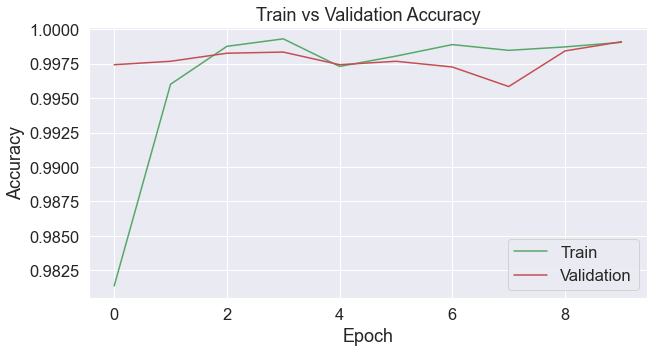

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(training_accuracy,'g', label='Train')
plt.plot(validation_accuracy,'r', label='Validation')
plt.title('Train vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.savefig('[Quantized]_train-val_acc_plot.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

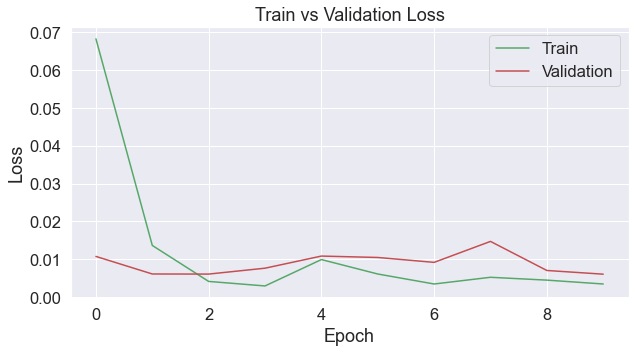

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(training_loss,'g', label='Train')
plt.plot(validation_loss,'r', label='Validation')
plt.title('Train vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('[Quantized]_train-val_loss_plot.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
loss, acc = q_aware_model.evaluate(test_dataset)
print(f"Test Accuracy : {acc}")
print(f"Test Loss : {loss}")

32/32 [==============================] - 6s 181ms/step - loss: 0.0066 - accuracy: 0.9985
Test Accuracy : 0.9984999895095825
Test Loss : 0.006597570609301329


In [ ]:
predictions = q_aware_model.predict(test_dataset)
predicted_labels = tf.argmax(predictions, axis=1)

true_labels = tf.concat([label for _, label in test_dataset], axis=0)
true_labels = tf.argmax(true_labels, axis=1)

class_report = classification_report(true_labels, predicted_labels, digits=6, zero_division=0)
print(class_report)

32/32 [==============================] - 8s 229ms/step
              precision    recall  f1-score   support

           0   0.985222  1.000000  0.992556       200
           1   1.000000  0.985000  0.992443       200
           2   1.000000  1.000000  1.000000       200
           3   1.000000  1.000000  1.000000       200
           4   1.000000  1.000000  1.000000       200
           5   1.000000  1.000000  1.000000       200
           6   1.000000  1.000000  1.000000       200
           7   1.000000  1.000000  1.000000       200
           8   1.000000  1.000000  1.000000       200
           9   1.000000  1.000000  1.000000       200

    accuracy                       0.998500      2000
   macro avg   0.998522  0.998500  0.998500      2000
weighted avg   0.998522  0.998500  0.998500      2000



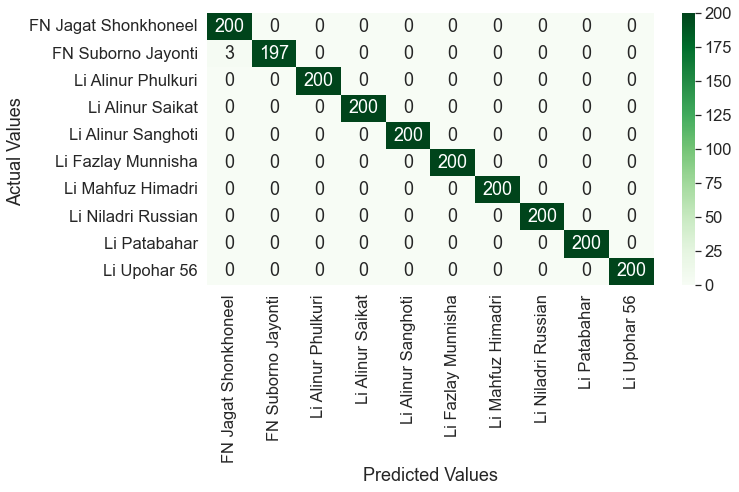

In [ ]:
cm = confusion_matrix(true_labels, predicted_labels)
class_names = test_dataset.class_names

plt.figure(figsize=(10, 5))
sns.set(font_scale=1.5)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=True, xticklabels=class_names, yticklabels=class_names)
ax.set_xticklabels(class_names, rotation=90)
ax.set_yticklabels(class_names, rotation=0)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ')

plt.savefig('[Quantized]_confusion_matrix_test.pdf', format='pdf', dpi=300, bbox_inches='tight')
plt.show()

### **TensorFlow Lite Conversion**

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_q_aware_model = converter.convert()

In [ ]:
with open('tflite_q_aware_model.tflite', 'wb') as f:
    f.write(tflite_q_aware_model)

In [ ]:
q_aware_model.save("[Quantized]_Bangla_Visual_Font_Recognizer.h5")
tf.keras.utils.plot_model(
    q_aware_model, to_file='[Quantized]_Bangla_Visual_Font_Recognizer.pdf', show_shapes=True, show_dtype=False,
    show_layer_names=False, rankdir='TB', expand_nested=False, dpi=100,
    layer_range=None, show_layer_activations=True
)